In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [36]:
n = 3

magStrength = 2
g = 9.8
L = 1
R = 1
m = 1
h = 0.25
b=0.2

eps = 0

def dist(theta, phi, i):
        return np.sqrt( (L*np.sin(phi)*np.cos(theta)-R*np.cos(2*np.pi*i/n))**2 
    + (L*np.sin(phi)*np.sin(theta)-R*np.sin(2*np.pi*i/n))**2
    + (L+h-L*np.cos(phi))**2);

def odeFunc(U,t):
    theta,phi,dtheta,dphi = U

    s1 = -2*np.cos(phi)/np.sin(phi)*dtheta*dphi;
    s2 = np.sin(phi)*np.cos(phi)*dtheta**2-m*g/(2*L)*np.sin(phi);

    for i in range(n):
        di = dist(theta, phi, i+1);
        alpha = np.arcsin((L+h-L*np.cos(phi))/(di));
        force = magStrength/di**4 #* (2*np.cos(alpha-np.pi/2)*np.cos(alpha+phi-np.pi/2)
                                         # -np.sin(alpha-np.pi/2)*np.sin(alpha+phi-np.pi/2));

        s1 += force/(m*L*L*np.sin(theta)**2+eps)*R*np.cos(phi)*np.sin(2*np.pi*(i+1)/n-theta)/(L*L*np.sin(phi)+eps);
        s2 += force/(2*L**2)*np.cos(phi)*(np.cos(phi)*(1-R/L*np.cos(2*np.pi*(i+1)/n-theta)/(np.sin(phi)+eps))-np.cos(theta)+1+h/L);

    return [dtheta,dphi,s1-b*dtheta,s2-b*dphi];

In [41]:
n = 3

magStrength = 1
g = 9.8
L = 1
R = 1
m = 2
h = 0.25
b=0.1

eps = 0

def dist(x, y, i): #toy equations
    return np.sqrt((x-R*np.cos(2*np.pi*i/n))**2 + (y-R*np.sin(2*np.pi*i/n))**2 + h**2);

def acc(U, t):

    x,dx,y,dy = U

    s1 = -2*g * x - b*dx;
    s2 = -2*g * y - b*dy;
    for i in range(n):
        di5 = dist(x, y, i+1)**(-5);
        s1 += -3*magStrength/m * di5 * (x-R*np.cos(2*np.pi*(i+1)/n));
        s2 += -3*magStrength/m * di5 * (y-R*np.sin(2*np.pi*(i+1)/n));
    return [dx,s1,dy,s2]

In [42]:
t = np.linspace(0,100,10000)
U0 = [0.5,0,0.7,0]

sol = odeint(acc, U0, t)

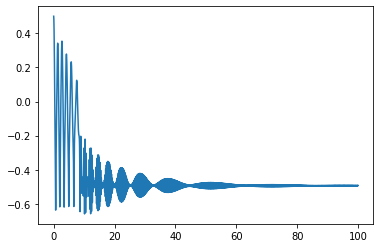

In [43]:
plt.plot(t,sol[:,0])

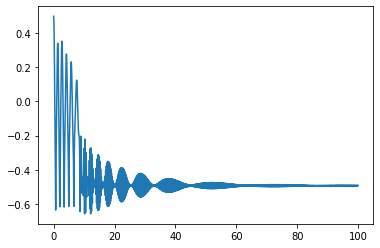

In [44]:
dx = 0.0001
dy = 0.0001
U0 = [0.5+dx,0,0.7+dy,0]
sol2 = odeint(acc,U0, t)

plt.plot(t,sol2[:,0])

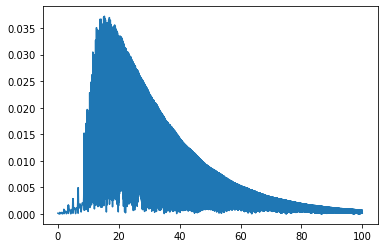

In [45]:
dlist = np.sqrt((sol[:,0]-sol2[:,0])**2+(sol[:,2]-sol2[:,2])**2)
plt.plot(t,dlist)

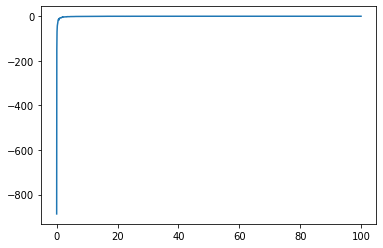

In [53]:
plt.plot(t[1:],(1/t[1:]*np.log(dlist[1:])))